# Examples of loading Images in Python

Classify images with ```darknet``` with images from:

- A file path. (str)
- ```PIL.Image.open``` object.
- ```imageio.imread``` numpy array.
- ```cv2.imread numpy``` array.

A behind the scenes look at how ```darknet``` stores the image data as floats and how to convert it to and from numpy arrays in Python.

In [1]:
import numpy as np
import ctypes
# Number of datapoints to check against
n = 10 
import pydarknet2

# Darknet image C structure datatype

Defined in ```structs.py```

In [2]:
from pydarknet2.libdarknet.structs import Image

Load image with ```load_image_color``` in the shared library.

```Libdarknet``` paths are always relative to the ```darknet``` directory. Because reasons.

In [3]:
lib = pydarknet2.libdarknet.Libdarknet()
img = lib.load_image_color("data/dog.jpg")
img

Image<768x576x3>

In [4]:
type(img)

pydarknet2.libdarknet.structs.Image

Image attributes:

In [5]:
img.h # height

576

In [6]:
img.w # width

768

In [7]:
img.c # colors

3

Single pixel color information, as used by darknet and stored in Image datatype:

In [8]:
img.float[0]

0.2235294133424759

Converted to uint8:

In [9]:
np.uint8(img.float[0]*255)

57

First ```n``` data points as stored in C, as uint8s

In [10]:
check_=np.multiply(img.float[0:n], 255).astype(np.uint8)
check_

array([57, 58, 60, 61, 62, 61, 58, 57, 56, 57], dtype=uint8)

Get the absolute path to the dog picture for other libraries.

In [11]:
dog_path = lib.root+"/data/dog.jpg"

## Pillow

https://python-pillow.org/

> ... the friendly PIL fork. PIL is the Python Imaging Library.

In [12]:
import PIL

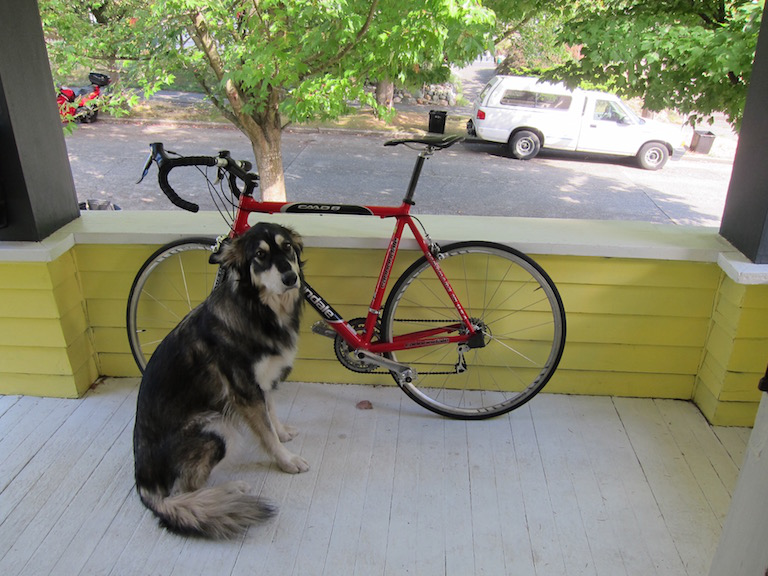

In [13]:
img = PIL.Image.open(dog_path)
img

In [14]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [15]:
img.size # Notice size is width x height.

(768, 576)

In [16]:
w, h = img.size

Convert to numpy array:

In [17]:
img_ = np.asarray(img, dtype=np.uint8)
img_

array([[[ 57,  58,  50],
        [ 58,  59,  51],
        [ 60,  61,  53],
        ...,
        [143,  89,  43],
        [ 89,  49,  41],
        [ 65,  70,  47]],

       [[ 58,  59,  51],
        [ 58,  59,  51],
        [ 59,  60,  52],
        ...,
        [124,  75,  35],
        [ 84,  50,  41],
        [ 58,  70,  46]],

       [[ 58,  59,  51],
        [ 58,  59,  51],
        [ 59,  60,  52],
        ...,
        [ 98,  54,  25],
        [ 78,  53,  48],
        [ 44,  63,  41]],

       ...,

       [[160, 168, 179],
        [160, 168, 179],
        [163, 171, 182],
        ...,
        [ 80,  64,  64],
        [ 53,  39,  36],
        [ 62,  53,  48]],

       [[161, 169, 180],
        [160, 168, 179],
        [156, 164, 175],
        ...,
        [ 79,  61,  61],
        [ 54,  40,  37],
        [ 67,  56,  52]],

       [[157, 165, 176],
        [159, 167, 178],
        [153, 161, 172],
        ...,
        [ 80,  62,  62],
        [ 51,  36,  33],
        [ 50,  39,  35]]

In [18]:
type(img_)

numpy.ndarray

In [19]:
img_.shape # Notice the numpy array is height x width

(576, 768, 3)

In [20]:
h, w, c = img_.shape

All 3 colors of the first pixel in RGB:

In [21]:
img_[0,0,:]

array([57, 58, 50], dtype=uint8)

First N data points as they will be stored in the C array.

In [22]:
check = img_[0, 0:n, 0]
check

array([57, 58, 60, 61, 62, 61, 58, 57, 56, 57], dtype=uint8)

Compare against the darknet loaded image & values:

In [23]:
assert np.allclose(check_, check)

Reshape the matrix for storage in the Image structure:

In [24]:
img2 = img_.transpose(2, 0, 1)
img2

array([[[ 57,  58,  60, ..., 143,  89,  65],
        [ 58,  58,  59, ..., 124,  84,  58],
        [ 58,  58,  59, ...,  98,  78,  44],
        ...,
        [160, 160, 163, ...,  80,  53,  62],
        [161, 160, 156, ...,  79,  54,  67],
        [157, 159, 153, ...,  80,  51,  50]],

       [[ 58,  59,  61, ...,  89,  49,  70],
        [ 59,  59,  60, ...,  75,  50,  70],
        [ 59,  59,  60, ...,  54,  53,  63],
        ...,
        [168, 168, 171, ...,  64,  39,  53],
        [169, 168, 164, ...,  61,  40,  56],
        [165, 167, 161, ...,  62,  36,  39]],

       [[ 50,  51,  53, ...,  43,  41,  47],
        [ 51,  51,  52, ...,  35,  41,  46],
        [ 51,  51,  52, ...,  25,  48,  41],
        ...,
        [179, 179, 182, ...,  64,  36,  48],
        [180, 179, 175, ...,  61,  37,  52],
        [176, 178, 172, ...,  62,  33,  35]]], dtype=uint8)

In [25]:
img2.shape

(3, 576, 768)

All 3 colors of the first pixel in RGB, after transformation.

In [26]:
img2[:,0,0]

array([57, 58, 50], dtype=uint8)

Compare against the darknet loaded image & values:

In [27]:
check = img2[0,0,0:n]
check

array([57, 58, 60, 61, 62, 61, 58, 57, 56, 57], dtype=uint8)

In [28]:
assert np.allclose(check_, check)

In [29]:
array = img2
# 
colors = array.shape[0]
height = array.shape[1]
width  = array.shape[2]

array.shape

(3, 576, 768)

In [30]:
# Scale the uint8s to floats and flatten the array
array_ = (array.astype(np.float) / 255.0).flatten()

In [31]:
colors * height * width

1327104

In [32]:
array_.shape # Flattened array has same number of data points.

(1327104,)

In [33]:
assert array_.shape[0]==colors * height * width

Convert the Python datatypes to an array of given datatype:

In [34]:
def c_array(values, ctype=ctypes.c_float):
    arr = (ctype * len(values))()
    arr[:] = values
    return arr

In [35]:
data = c_array(array_)
data

In [36]:
data[0]

0.2235294133424759

In [37]:
np.uint8(data[0]*255)

57

Create an image datatype

In [38]:
img2_ = Image(width, height, colors, data)

In [39]:
img2_.c*img2_.h*img2_.w

1327104

In [40]:
check = np.multiply(img2_.float[0:n], 255).astype(np.uint8)
check

array([57, 58, 60, 61, 62, 61, 58, 57, 56, 57], dtype=uint8)

In [41]:
assert np.allclose(check_, check)

# imageio

https://imageio.github.io/

> Imageio is a Python library that provides an easy interface to read and write a wide range of image data, including animated images, video, volumetric data, and scientific formats. It is cross-platform, runs on Python 2.7 and 3.4+, and is easy to install.

In [42]:
import imageio

In [43]:
img = imageio.imread(dog_path)

In [44]:
img[0,0,:]

Array([57, 58, 50], dtype=uint8)

In [45]:
check = img[0, 0:n, 0]
check

Array([57, 58, 60, 61, 62, 61, 58, 57, 56, 57], dtype=uint8)

In [46]:
assert np.allclose(check_, check)

In [47]:
img.shape

(576, 768, 3)

In [48]:
type(img)

imageio.core.util.Array

Reshape matrix:

In [49]:
img2 = img.transpose(2, 0, 1)
img2

Array([[[ 57,  58,  60, ..., 143,  89,  65],
        [ 58,  58,  59, ..., 124,  84,  58],
        [ 58,  58,  59, ...,  98,  78,  44],
        ...,
        [160, 160, 163, ...,  80,  53,  62],
        [161, 160, 156, ...,  79,  54,  67],
        [157, 159, 153, ...,  80,  51,  50]],

       [[ 58,  59,  61, ...,  89,  49,  70],
        [ 59,  59,  60, ...,  75,  50,  70],
        [ 59,  59,  60, ...,  54,  53,  63],
        ...,
        [168, 168, 171, ...,  64,  39,  53],
        [169, 168, 164, ...,  61,  40,  56],
        [165, 167, 161, ...,  62,  36,  39]],

       [[ 50,  51,  53, ...,  43,  41,  47],
        [ 51,  51,  52, ...,  35,  41,  46],
        [ 51,  51,  52, ...,  25,  48,  41],
        ...,
        [179, 179, 182, ...,  64,  36,  48],
        [180, 179, 175, ...,  61,  37,  52],
        [176, 178, 172, ...,  62,  33,  35]]], dtype=uint8)

In [50]:
img2.shape

(3, 576, 768)

In [51]:
colors=img2.shape[0]
height=img2.shape[1]
width=img2.shape[2]

In [52]:
img2[:,0,0]

Array([57, 58, 50], dtype=uint8)

In [53]:
check = img2[0,0,0:n]
check

Array([57, 58, 60, 61, 62, 61, 58, 57, 56, 57], dtype=uint8)

In [54]:
assert np.allclose(check_, check)

In [55]:
array=img2

In [56]:
# Scale the uint8s to floats and flatten the array
array_ = (array.astype(np.float) / 255.0).flatten()

In [57]:
array_

Array([0.22352941, 0.22745098, 0.23529412, ..., 0.24313725, 0.12941176,
       0.1372549 ])

In [58]:
img2_ = Image(width, height, colors, data)


## OpenCV

https://opencv.org/

> OpenCV (Open Source Computer Vision Library) is an open source computer vision and machine learning software library. OpenCV was built to provide a common infrastructure for computer vision applications and to accelerate the use of machine perception in the commercial products. Being a BSD-licensed product, OpenCV makes it easy for businesses to utilize and modify the code.

Getting OpenCV Python3 library:

1. ```sudo apt-get install python3-opencv``` on Ubuntu 18.04.
2. Compile opencv2 and install in your virtualenv.

In [61]:
import cv2

In [62]:
img = cv2.imread(dog_path)
img

array([[[ 50,  58,  57],
        [ 51,  59,  58],
        [ 53,  61,  60],
        ...,
        [ 47,  89, 142],
        [ 41,  50,  88],
        [ 47,  71,  63]],

       [[ 51,  59,  58],
        [ 51,  59,  58],
        [ 52,  60,  59],
        ...,
        [ 37,  74, 124],
        [ 41,  50,  83],
        [ 46,  70,  58]],

       [[ 51,  59,  58],
        [ 51,  59,  58],
        [ 52,  60,  59],
        ...,
        [ 25,  54,  98],
        [ 48,  54,  77],
        [ 43,  62,  45]],

       ...,

       [[179, 168, 160],
        [179, 168, 160],
        [182, 171, 163],
        ...,
        [ 64,  64,  80],
        [ 36,  39,  53],
        [ 48,  53,  62]],

       [[180, 169, 161],
        [179, 168, 160],
        [175, 164, 156],
        ...,
        [ 61,  61,  79],
        [ 37,  40,  54],
        [ 52,  56,  67]],

       [[176, 165, 157],
        [178, 167, 159],
        [172, 161, 153],
        ...,
        [ 62,  62,  80],
        [ 33,  36,  50],
        [ 35,  39,  50]]

In [63]:
img.shape

(576, 768, 3)

In [64]:
type(img)

numpy.ndarray

In [65]:
# OpenCV is BGR not RGB!
img[0,0,:]

array([50, 58, 57], dtype=uint8)

In [66]:
check = img[0, 0:n, 0]
check

array([50, 51, 53, 54, 55, 54, 51, 50, 49, 50], dtype=uint8)

In [67]:
np.allclose(check, check_)

False

Convert BGR to RGB:

In [68]:
img_ = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [69]:
img_.shape

(576, 768, 3)

In [70]:
img_[0,0,:]

array([57, 58, 50], dtype=uint8)

In [71]:
check = img_[0, 0:n, 0]
check

array([57, 58, 60, 61, 62, 61, 58, 57, 56, 57], dtype=uint8)

In [72]:
assert np.allclose(check, check_)

# From darknet Image to other Types:

In [73]:
img = lib.load_image_color("data/dog.jpg")
img

Image<768x576x3>

In [74]:
img.h

576

In [75]:
img.w

768

In [76]:
img.c

3

In [77]:
data = img.float[0:img.h*img.w*img.c]

In [78]:
type(data)

list

In [79]:
data_ = np.asarray(data)

In [80]:
data_.shape

(1327104,)

In [81]:
data__ = data_.reshape((img.c, img.h, img.w))

In [82]:
data__.shape

(3, 576, 768)

In [83]:
img=data__.transpose(1, 2, 0)
img.shape

(576, 768, 3)

In [84]:
img_=np.multiply(img, 255.0).astype(dtype=np.uint8)

In [85]:
img_[0,0,:]

array([57, 58, 50], dtype=uint8)

In [86]:
check = img_[0, 0:n, 0]
check

array([57, 58, 60, 61, 62, 61, 58, 57, 56, 57], dtype=uint8)

In [87]:
assert np.allclose(check, check_)

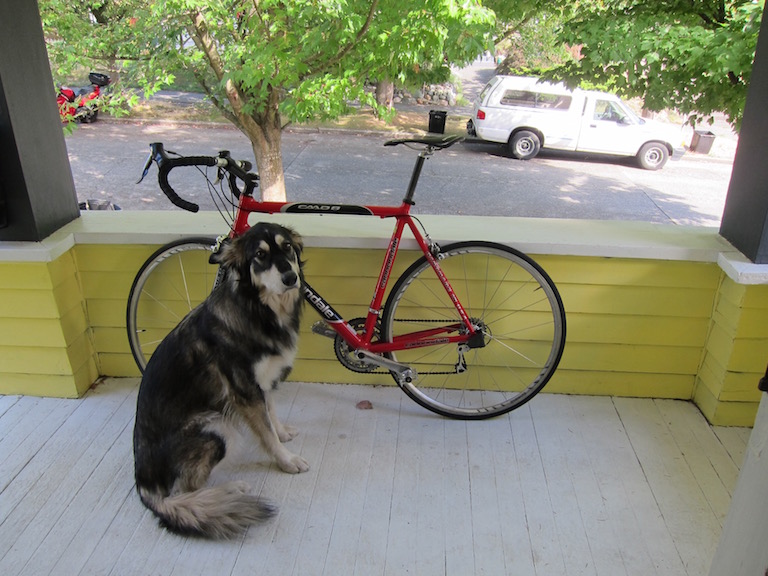

In [88]:
img = PIL.Image.fromarray(img_)
img

Check jpeg with at external file viewer:

In [89]:
img.save("/tmp/dog.jpg")

In [90]:
img_cv2 = cv2.cvtColor(img_, cv2.COLOR_RGB2BGR)
cv2.imwrite("/tmp/dog.jpg", img_cv2)

True